In [3]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
from scipy import stats


In [5]:
# creating database connetion
conn=sqlite3.connect('inventory.db')
#fetching vendor summary data
df=pd.read_sql_query("select* from vendor_sales_summary",conn)
df.head()
                     

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


## performing EDA on final dataset

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


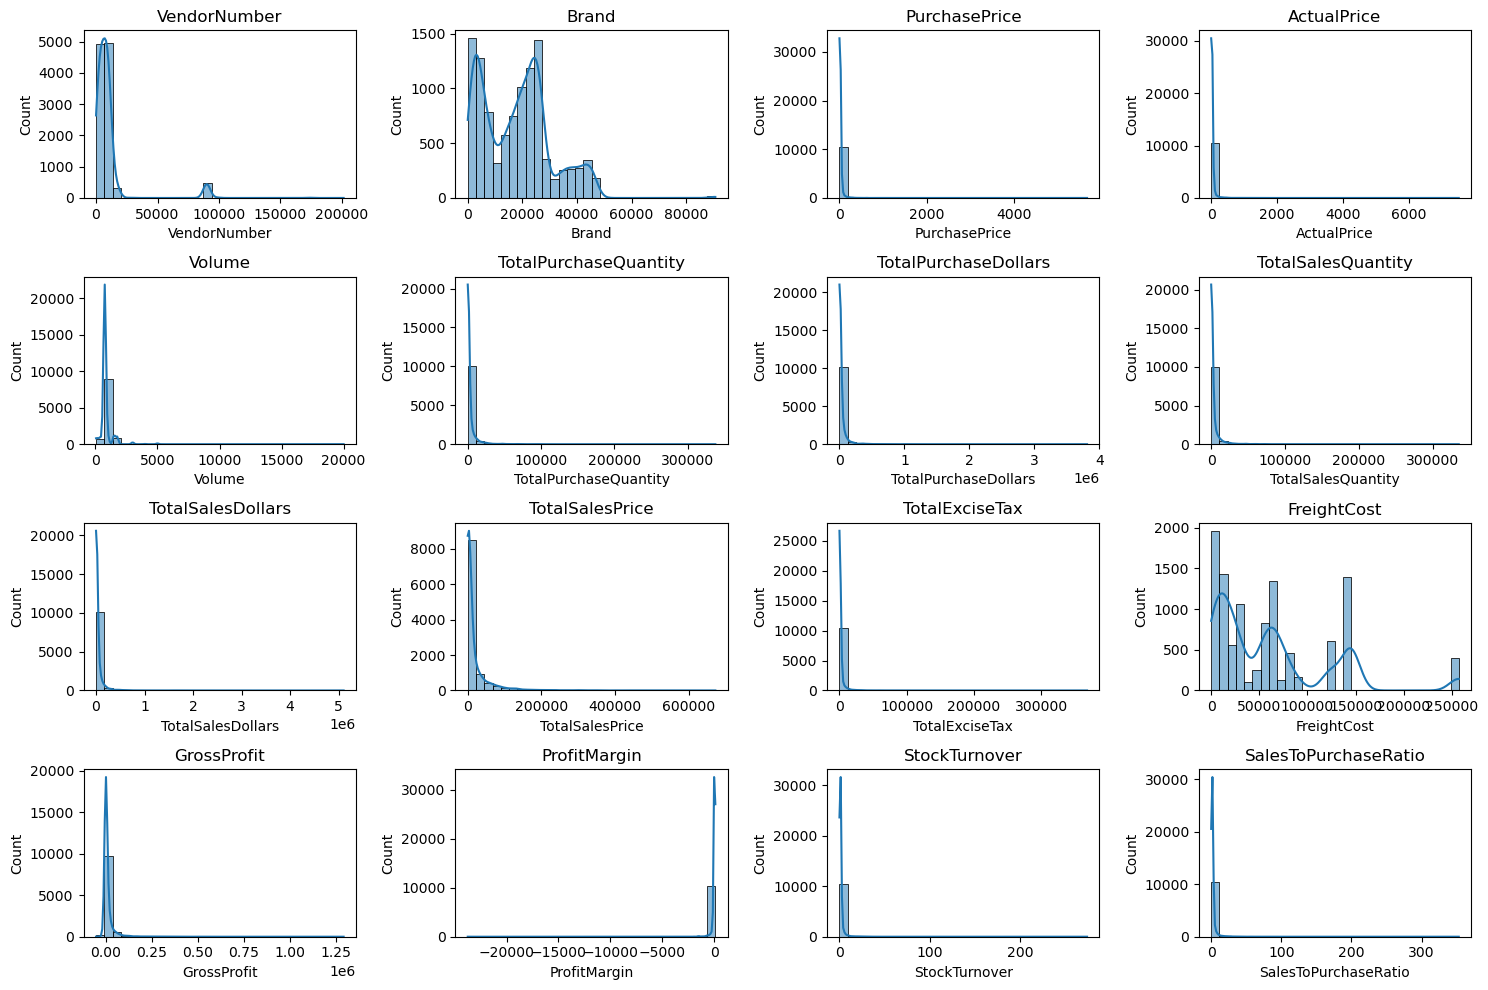

In [10]:
# Distribution plot for numerical columns
num_col=df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15,10))
for i ,col in enumerate(num_col):
    plt.subplot(4,4,i+1) # Adjusting grid layout
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()


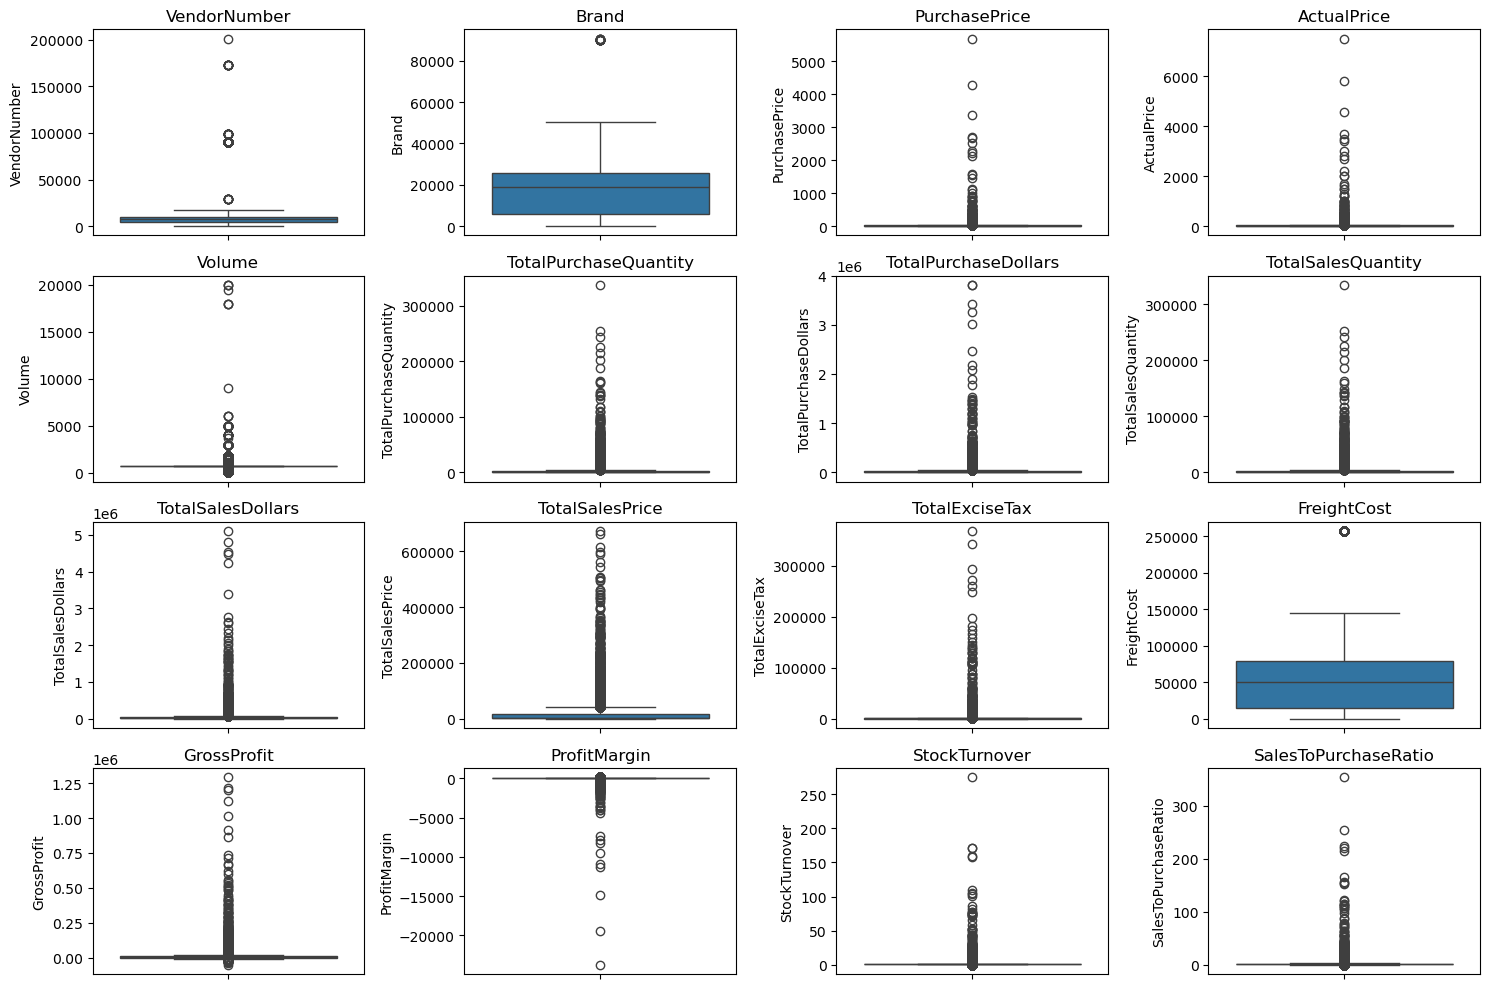

In [12]:
# Distribution plot for numerical columns using box plot
num_col=df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15,10))
for i ,col in enumerate(num_col):
    plt.subplot(4,4,i+1) # Adjusting grid layout
    sns.boxplot(df[col])
    plt.title(col)

plt.tight_layout()
plt.show()



### The analysis of negative and zero values shows that the 
--->gross profit has a minimum value of -52,002.78, indicating losses where some products or transactions may be selling at a loss due to high costs or discounts below purchase price. 
--->The profit margin has a minimum of negative infinity, suggesting scenarios where revenue is zero or even lower than costs. Additionally, total sales quantity and sales dollars have minimum values of 0, meaning some products were purchased but never sold, which could indicate slow-moving or obsolete stock.
### Outliers indicated by high standard deviations
---> purchase and actual prices, where maximum values (5,681.81 and 7,499.99) are significantly higher than the means (24.39 and 35.64), pointing to potential premium products.
--->Freight cost shows huge variation from 0.09 to 257,032.07, suggesting logistics inefficiencies or bulk shipments. 
--->Stock turnover ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely, and a value greater than 1 indicates that sold quantity exceeds purchased quantity, possibly due to sales being fulfilled from older stock.


In [16]:
df.shape

(10692, 18)

## Removing inconsistency

In [17]:
df=pd.read_sql_query("""
select* from vendor_sales_summary
where GrossProfit>0
and profitMargin>0
and TotalSalesQuantity>0""",conn)

In [19]:
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [22]:
df.shape

(8564, 18)

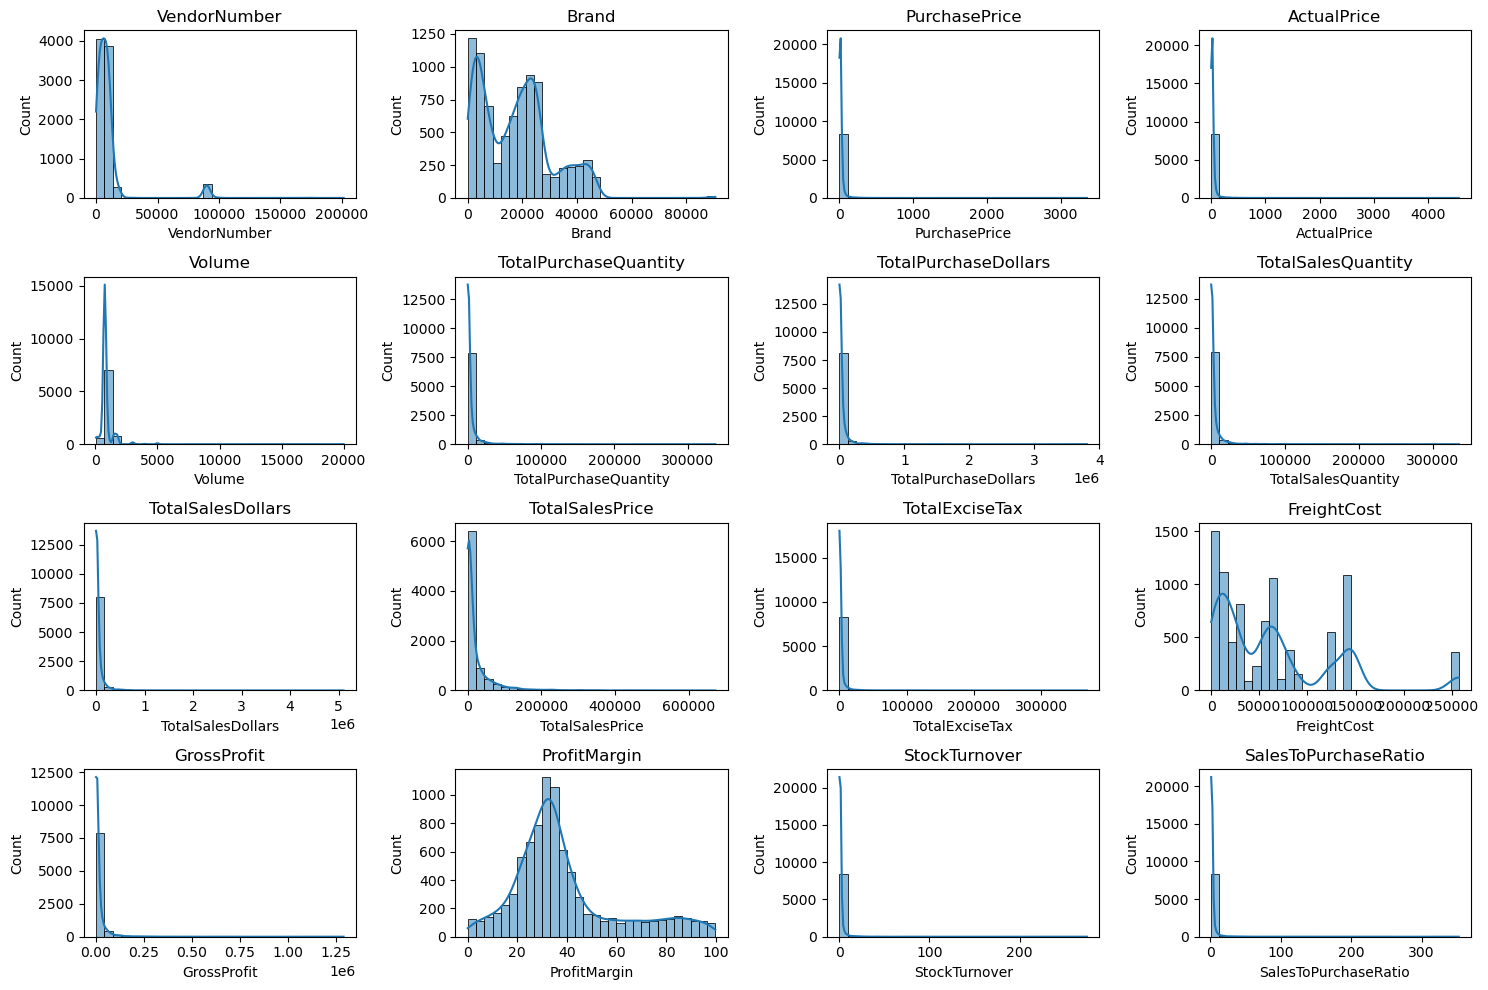

In [23]:
# Distribution plot for numerical columns
num_col=df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15,10))
for i ,col in enumerate(num_col):
    plt.subplot(4,4,i+1) # Adjusting grid layout
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

### count plot for categorical columns

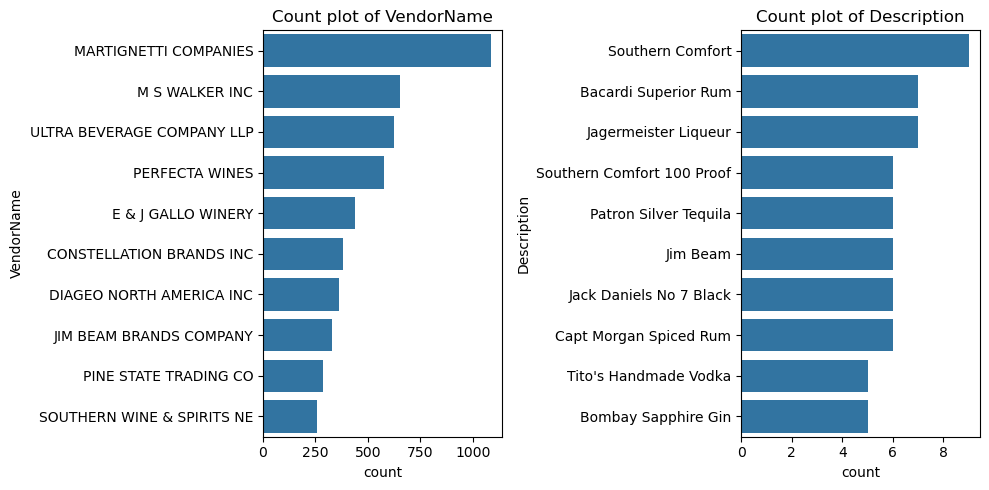

In [30]:
cat_col = ["VendorName", "Description"]  # Description includes product names

plt.figure(figsize=(10, 5))  # Set the overall figure size

for i, col in enumerate(cat_col):
    plt.subplot(1, 2, i + 1)  # Create a subplot for each categorical column
    top_10 = df[col].value_counts().nlargest(10).index  # Get top 10 categories
    sns.countplot(y=df[col], order=top_10)  # Plot count of top 10 categories
    plt.title(f"Count plot of {col}")  # Set title for each subplot

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()  # Display the plot


## Correlation

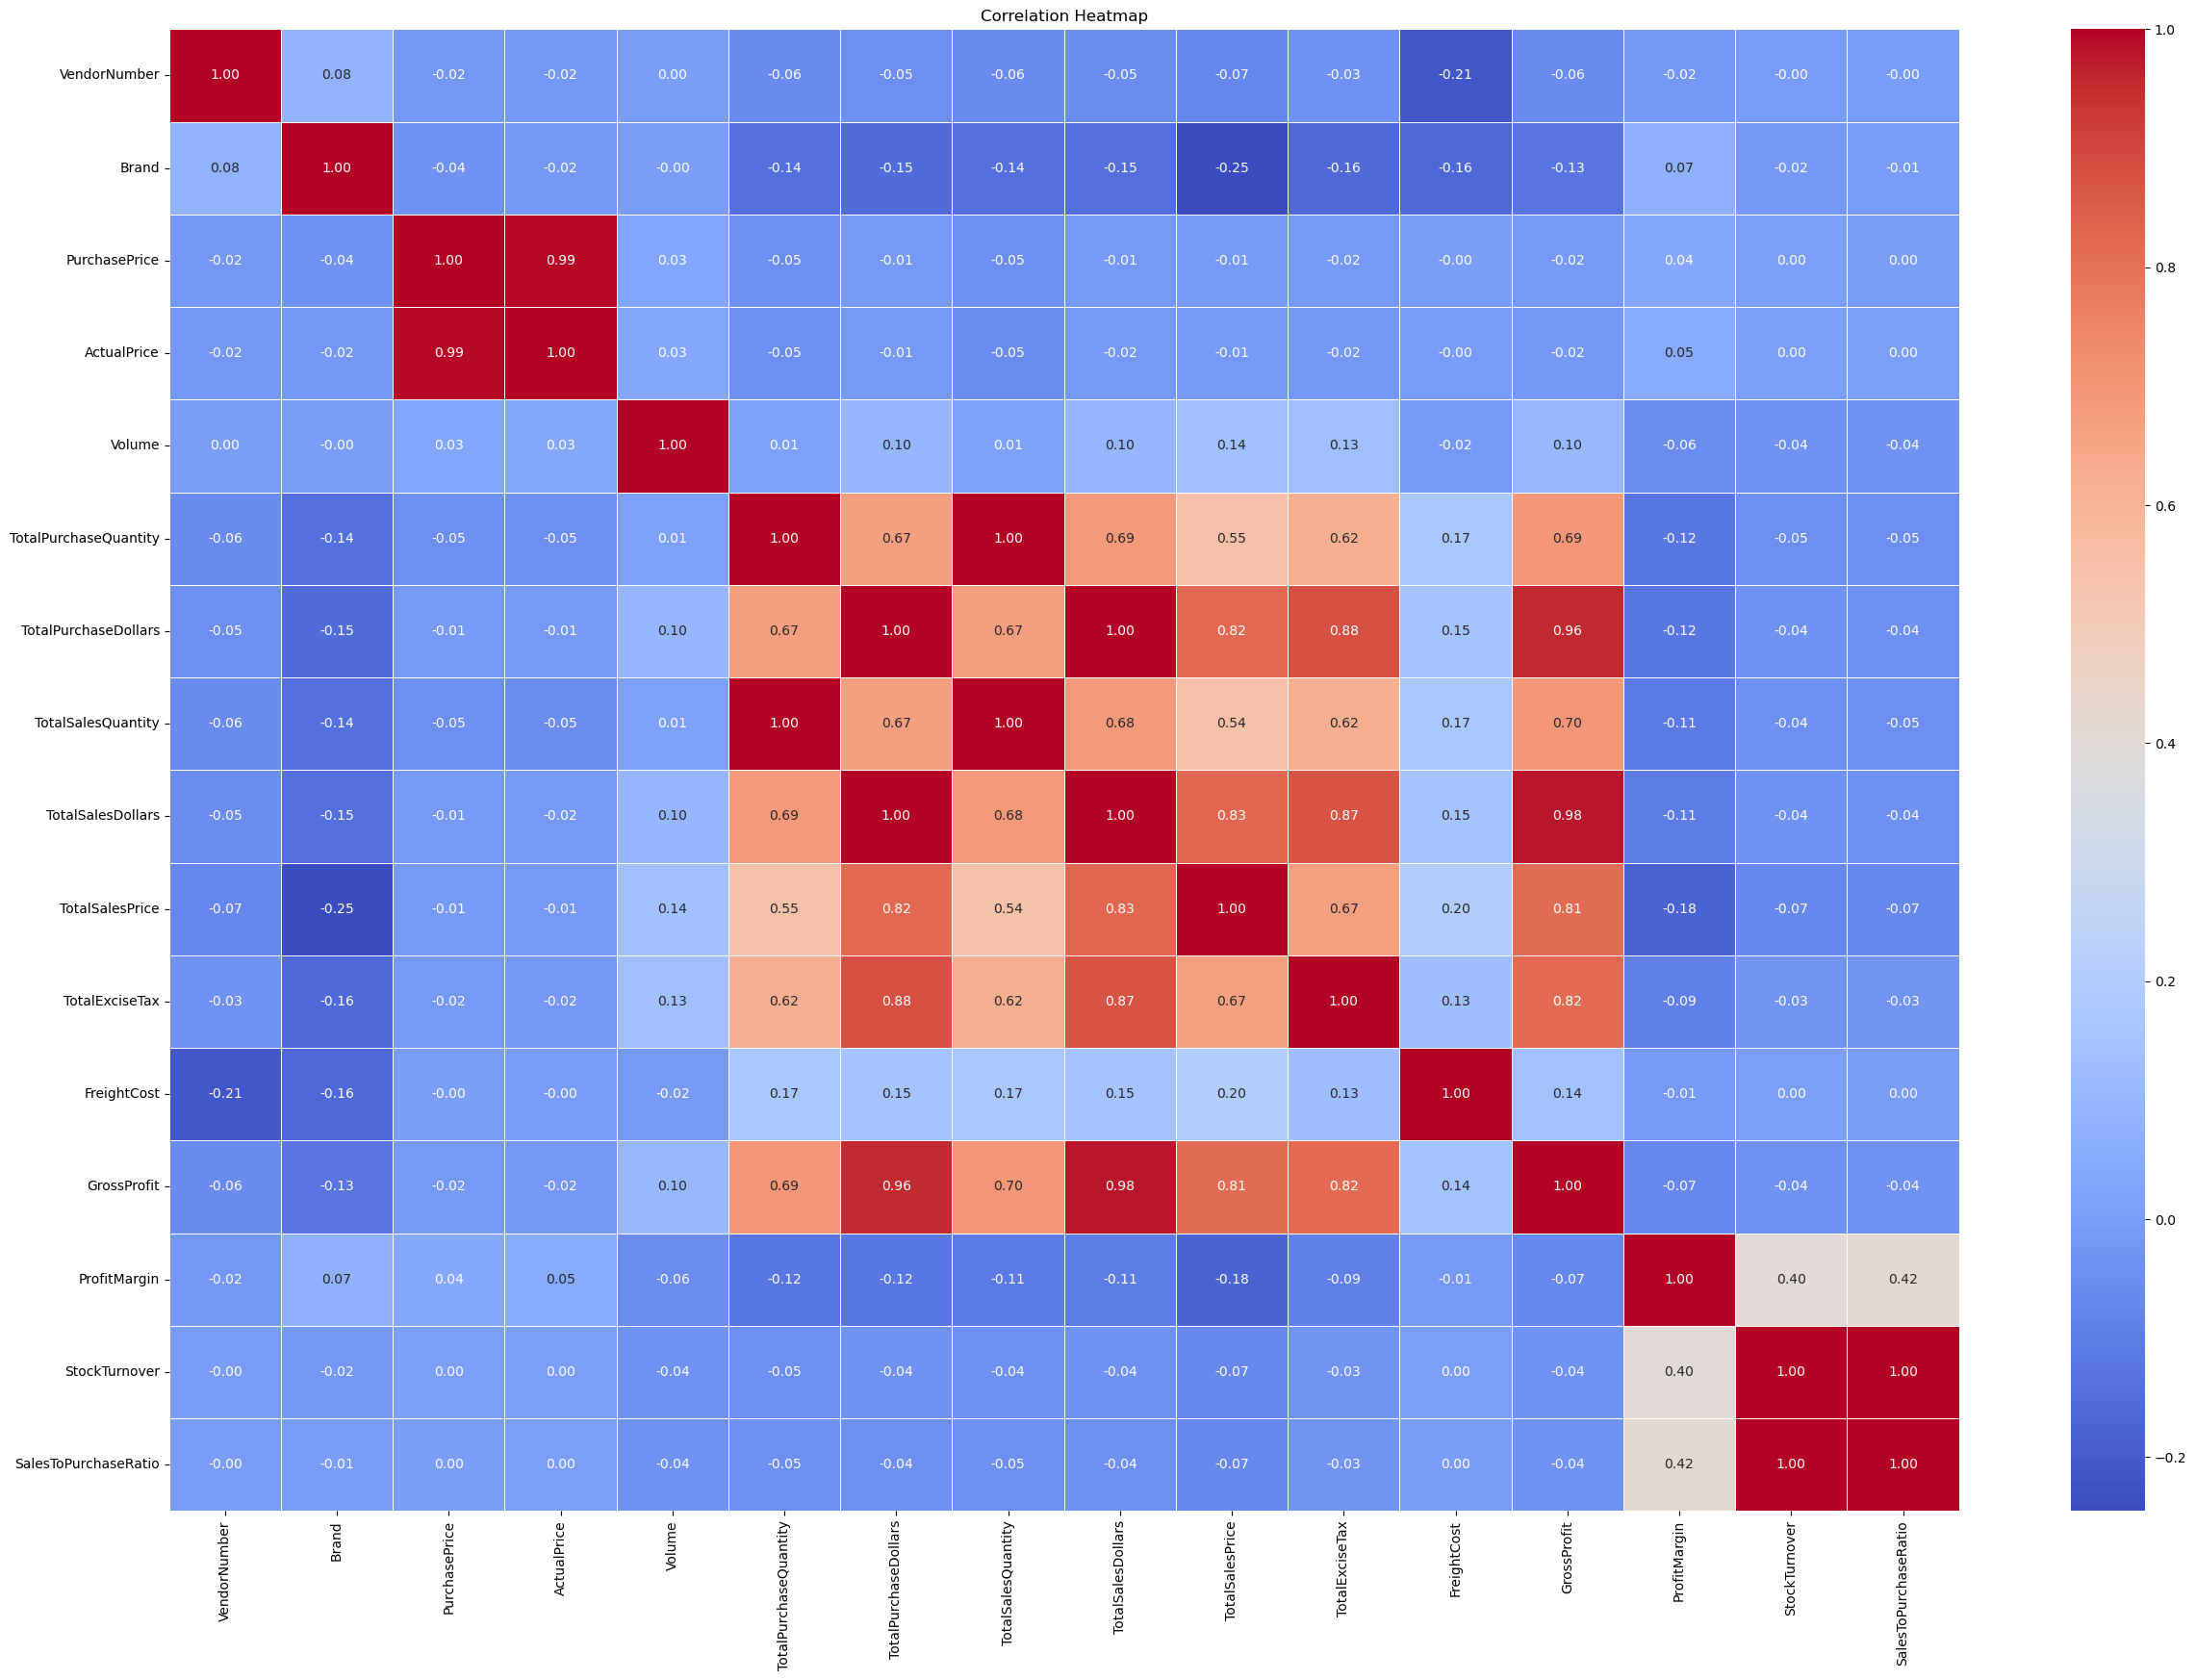

In [41]:
plt.figure(figsize=(30,20))
correlation_matrix=df[num_col].corr()
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="coolwarm",linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Correlation Insights

## Data Analysis

In [43]:
df.head(2)

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830


In [48]:
brand_performance=df.groupby('Description').agg(
    {
        'TotalSalesDollars':'sum',
        'ProfitMargin':'mean'
    }
).reset_index()

In [51]:
low_sales_threshold=brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold=brand_performance['ProfitMargin'].quantile(0.85)

In [52]:
low_sales_threshold

560.299

In [53]:
high_margin_threshold

64.97017552750113

## Filter brands with low sales but high Profit margin

In [54]:
# Filter brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]

print("Brands with Low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))


Brands with Low Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [69]:
df.head(1)

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.6,142049.0,5101919.51,672819.31,260999.2,68601.68,1290667.91,25.297693,0.979108,1.338647


In [82]:
df_grouped

,VendorName,Description,TotalSalesDollars
0,ADAMBA IMPORTS INTL INC,Bak's Krupnik Honey Liqueur,0.000705
1,ALISA CARR BEVERAGES,Ch Cantenac Brown Margaux 11,0.001800
2,ALISA CARR BEVERAGES,Ch Giscours Margaux 12,0.010228
3,ALISA CARR BEVERAGES,Ch Lafite Rothschild 12,0.009750
4,ALISA CARR BEVERAGES,Ch Le Petite Mouton 12 Pauil,0.003510
...,...,...,...
7719,ZORVINO VINEYARDS,Zorvino Fragole Z Strawberry,0.025476
7720,ZORVINO VINEYARDS,Zorvino Vyds Mango Magnifico,0.016225
7721,ZORVINO VINEYARDS,Zorvino Vyds Peachez,0.015494
7722,ZORVINO VINEYARDS,Zorvino Vyds Pearz,0.020629


In [76]:
df_grouped = df.groupby(['VendorName', 'Description'])['TotalSalesDollars'].sum().reset_index()
top_10 = df_grouped.nlargest(10, 'TotalSalesDollars')


In [77]:
top_10

,VendorName,Description,TotalSalesDollars
271,BROWN-FORMAN CORP,Jack Daniels No 7 Black,7964746.76
3986,MARTIGNETTI COMPANIES,Tito's Handmade Vodka,7399657.58
102,BACARDI USA INC,Grey Goose Vodka,7209608.06
1060,DIAGEO NORTH AMERICA INC,Capt Morgan Spiced Rum,6356320.62
4969,PERNOD RICARD USA,Absolut 80 Proof,6244752.03
5041,PERNOD RICARD USA,Jameson Irish Whiskey,5715759.69
1154,DIAGEO NORTH AMERICA INC,Ketel One Vodka,5070083.56
1029,DIAGEO NORTH AMERICA INC,Baileys Irish Cream,4150122.07
5045,PERNOD RICARD USA,Kahlua,3604858.66
1237,DIAGEO NORTH AMERICA INC,Tanqueray,3456697.90


In [80]:
df_grouped = df.groupby(['VendorName', 'Description'])['TotalSalesDollars'].sum().reset_index()

# Convert TotalSalesDollars to millions
df_grouped['TotalSalesDollars'] = df_grouped['TotalSalesDollars'] / 1000000

# Get top 10 by TotalSalesDollars (in millions)
top_10 = df_grouped.nlargest(10, 'TotalSalesDollars')


In [81]:
top_10

,VendorName,Description,TotalSalesDollars
271,BROWN-FORMAN CORP,Jack Daniels No 7 Black,7.964747
3986,MARTIGNETTI COMPANIES,Tito's Handmade Vodka,7.399658
102,BACARDI USA INC,Grey Goose Vodka,7.209608
1060,DIAGEO NORTH AMERICA INC,Capt Morgan Spiced Rum,6.356321
4969,PERNOD RICARD USA,Absolut 80 Proof,6.244752
5041,PERNOD RICARD USA,Jameson Irish Whiskey,5.715760
1154,DIAGEO NORTH AMERICA INC,Ketel One Vodka,5.070084
1029,DIAGEO NORTH AMERICA INC,Baileys Irish Cream,4.150122
5045,PERNOD RICARD USA,Kahlua,3.604859
1237,DIAGEO NORTH AMERICA INC,Tanqueray,3.456698


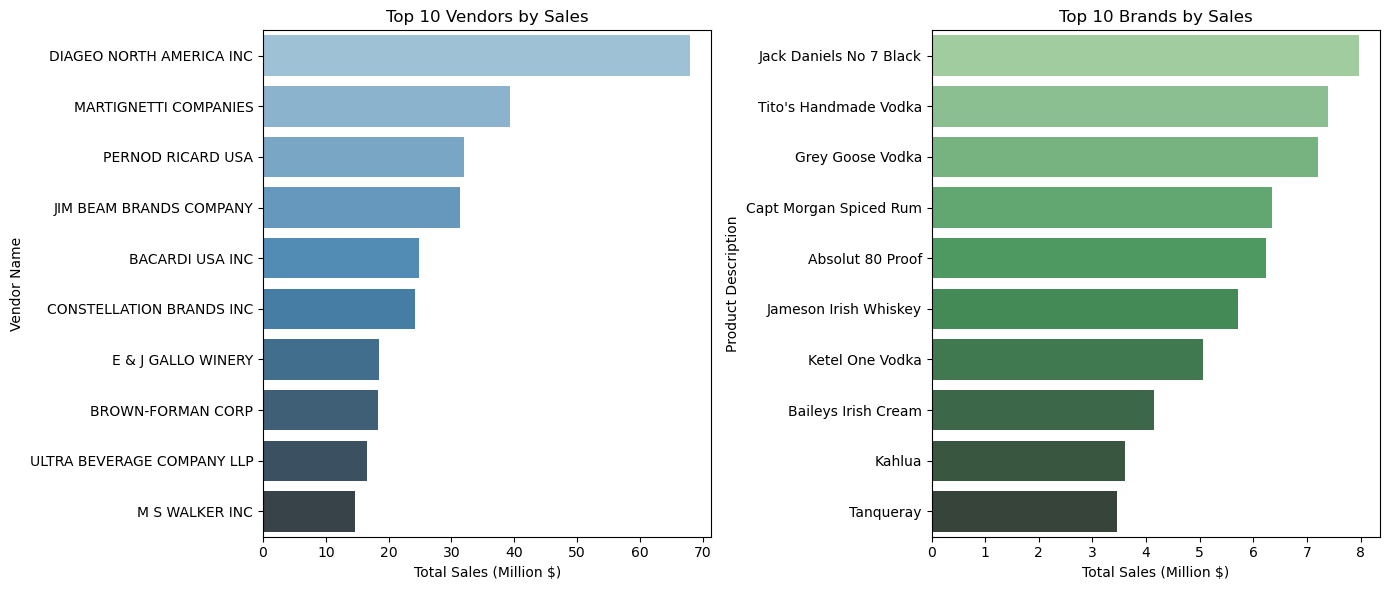

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by VendorName
vendor_sales = df.groupby('VendorName')['TotalSalesDollars'].sum().reset_index()
vendor_sales['TotalSalesMillion'] = vendor_sales['TotalSalesDollars'] / 1_000_000
top_vendors = vendor_sales.nlargest(10, 'TotalSalesMillion')

# Group by Description
description_sales = df.groupby('Description')['TotalSalesDollars'].sum().reset_index()
description_sales['TotalSalesMillion'] = description_sales['TotalSalesDollars'] / 1_000_000
top_descriptions = description_sales.nlargest(10, 'TotalSalesMillion')

# Plotting
plt.figure(figsize=(14, 6))

# Top 10 Vendors
plt.subplot(1, 2, 1)
sns.barplot(data=top_vendors, y='VendorName', x='TotalSalesMillion', palette='Blues_d')
plt.title('Top 10 Vendors by Sales')
plt.xlabel('Total Sales (Million $)')
plt.ylabel('Vendor Name')

# Top 10 Descriptions
plt.subplot(1, 2, 2)
sns.barplot(data=top_descriptions, y='Description', x='TotalSalesMillion', palette='Greens_d')
plt.title('Top 10 Brands by Sales')
plt.xlabel('Total Sales (Million $)')
plt.ylabel('Product Description')

plt.tight_layout()
plt.show()


In [85]:
df.head(1)

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.6,142049.0,5101919.51,672819.31,260999.2,68601.68,1290667.91,25.297693,0.979108,1.338647


In [90]:
vendor_performance=df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
})

In [94]:
vendor_performance['PurchaseCoutribution%']=(vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum())*100

In [95]:
vendor_performance

,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseCoutribution%
VendorName,,,,
ADAMBA IMPORTS INTL INC,446.16,258.37,704.53,0.000145
ALISA CARR BEVERAGES,25698.12,78772.82,104470.94,0.008362
ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81,0.003809
AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16,0.000304
AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53,0.033981
...,...,...,...,...
WEIN BAUER INC,42694.64,13522.49,56217.13,0.013892
WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83,0.097097
WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20,1.912074


In [97]:
vendor_performance=round(vendor_performance.sort_values('PurchaseCoutribution%',ascending=False),2)

In [98]:
vendor_performance

,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseCoutribution%
VendorName,,,,
DIAGEO NORTH AMERICA INC,50097226.16,17892873.26,67990099.42,16.30
MARTIGNETTI COMPANIES,25502095.83,13828263.53,39330359.36,8.30
PERNOD RICARD USA,23851164.17,8212032.02,32063196.19,7.76
JIM BEAM BRANDS COMPANY,23494304.32,7928716.14,31423020.46,7.64
BACARDI USA INC,17432020.26,7422796.88,24854817.14,5.67
...,...,...,...,...
FANTASY FINE WINES CORP,128.64,198.95,327.59,0.00
UNCORKED,118.74,58.20,176.94,0.00
SILVER MOUNTAIN CIDERS,77.18,265.33,342.51,0.00


In [100]:
# Define the formatter
def format_dollars(x):
    return "${:,.2f}".format(x)

# Display Top 10 Vendors
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors


,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseCoutribution%
VendorName,,,,
DIAGEO NORTH AMERICA INC,"$50,097,226.16","$17,892,873.26","$67,990,099.42",16.30
MARTIGNETTI COMPANIES,"$25,502,095.83","$13,828,263.53","$39,330,359.36",8.30
PERNOD RICARD USA,"$23,851,164.17","$8,212,032.02","$32,063,196.19",7.76
JIM BEAM BRANDS COMPANY,"$23,494,304.32","$7,928,716.14","$31,423,020.46",7.64
BACARDI USA INC,"$17,432,020.26","$7,422,796.88","$24,854,817.14",5.67
CONSTELLATION BRANDS INC,"$15,273,708.08","$8,945,037.57","$24,218,745.65",4.97
BROWN-FORMAN CORP,"$13,238,939.18","$5,008,291.47","$18,247,230.65",4.31
E & J GALLO WINERY,"$12,068,539.22","$6,331,360.24","$18,399,899.46",3.93
ULTRA BEVERAGE COMPANY LLP,"$11,167,081.61","$5,335,462.70","$16,502,544.31",3.63


In [101]:
top_vendors['PurchaseCoutribution%'].sum()

65.69000000000001

In [107]:
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseCoutribution%'].cumsum()
top_vendors


,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseCoutribution%,Cumulative_Contribution%
VendorName,,,,,
DIAGEO NORTH AMERICA INC,"$50,097,226.16","$17,892,873.26","$67,990,099.42",16.30,16.30
MARTIGNETTI COMPANIES,"$25,502,095.83","$13,828,263.53","$39,330,359.36",8.30,24.60
PERNOD RICARD USA,"$23,851,164.17","$8,212,032.02","$32,063,196.19",7.76,32.36
JIM BEAM BRANDS COMPANY,"$23,494,304.32","$7,928,716.14","$31,423,020.46",7.64,40.00
BACARDI USA INC,"$17,432,020.26","$7,422,796.88","$24,854,817.14",5.67,45.67
CONSTELLATION BRANDS INC,"$15,273,708.08","$8,945,037.57","$24,218,745.65",4.97,50.64
BROWN-FORMAN CORP,"$13,238,939.18","$5,008,291.47","$18,247,230.65",4.31,54.95
E & J GALLO WINERY,"$12,068,539.22","$6,331,360.24","$18,399,899.46",3.93,58.88
ULTRA BEVERAGE COMPANY LLP,"$11,167,081.61","$5,335,462.70","$16,502,544.31",3.63,62.51


In [112]:
df['UnitPurchasePrice']=df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']

In [114]:
df.head(1)


,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio,UnitPurchasePrice
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.6,142049.0,5101919.51,672819.31,260999.2,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27


In [117]:
df['orderSize']=pd.qcut(df['TotalPurchaseQuantity'],q=3,labels=["small","Medium","Large"])## distributed on the basis of quartile 

In [116]:
df.head(1)

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio,UnitPurchasePrice,orderSize
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.6,142049.0,5101919.51,672819.31,260999.2,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27,Large


In [124]:
df[['orderSize', 'TotalPurchaseDollars']]


,orderSize,TotalPurchaseDollars
0,Large,3811251.60
1,Large,3804041.22
2,Large,3418303.68
3,Large,3261197.94
4,Large,3023206.01
...,...,...
8559,small,2.64
8560,small,2.34
8561,small,1.48
8562,small,1.47


In [126]:
df.groupby('orderSize')[['UnitPurchasePrice']].mean()


,UnitPurchasePrice
orderSize,
small,39.068186
Medium,15.486414
Large,10.777625


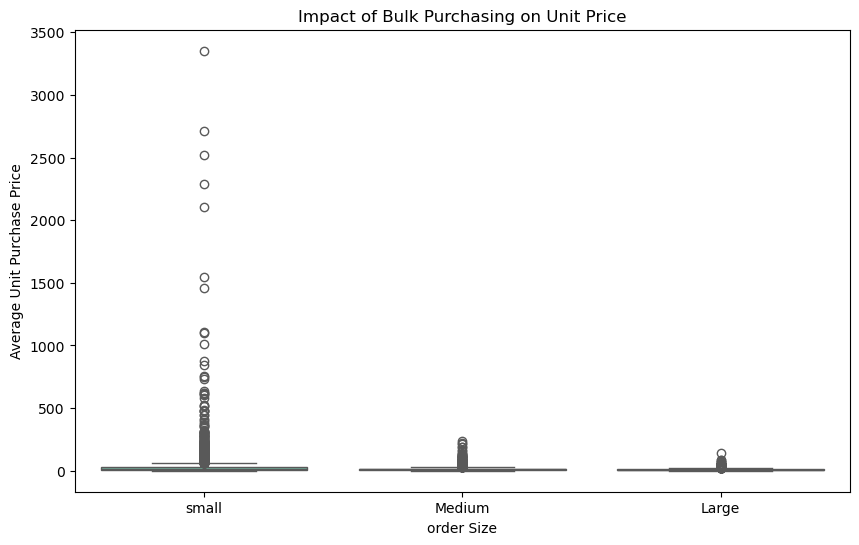

In [128]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="orderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()


In [135]:
df[df['StockTurnover']<1].groupby ('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending=True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


In [136]:
df["UnsoldInventoryValue"]=(df["TotalPurchaseQuantity"]-df["TotalSalesQuantity"])* df["PurchasePrice"]
print("Total Unsold Capital:",format_dollars(df["UnsoldInventoryValue"].sum()))

Total Unsold Capital: $2,708,177.22


In [139]:
# Aggregate Capital Locked per Vendor
inventory_value_per_vendor=df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()
# Sort Vendor with the Highest Locked Capital
inventory_value_per_vendor=inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue",ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue']=inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,"$722,209.05"
46,JIM BEAM BRANDS COMPANY,"$554,665.63"
68,PERNOD RICARD USA,"$470,625.61"
116,WILLIAM GRANT & SONS INC,"$401,960.83"
30,E & J GALLO WINERY,"$228,282.61"
79,SAZERAC CO INC,"$198,436.41"
11,BROWN-FORMAN CORP,"$177,733.74"
20,CONSTELLATION BRANDS INC,"$133,617.62"
61,MOET HENNESSY USA INC,"$126,477.70"
77,REMY COINTREAU USA INC,"$118,598.15"


In [140]:
## confidence interval means mean se kitna jyada deviate ho raha h

In [141]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()


In [142]:
top_vendors

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
3523    79.684817
3681    85.782102
4751    93.085860
4920    95.012530
5050    94.271857
Name: ProfitMargin, Length: 2141, dtype: float64

In [143]:
low_vendors

5631     4.111764
5652     6.145626
5701    12.007271
5704     1.677308
5724     7.239599
          ...    
8559    83.448276
8560    96.436186
8561    25.252525
8562    98.974037
8563    99.166079
Name: ProfitMargin, Length: 2141, dtype: float64

In [144]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))  # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error


Top Vendors 95% CI: (30.74, 31.61), Mean: 31.18
Low Vendors 95% CI: (30.74, 31.61), Mean: 31.18


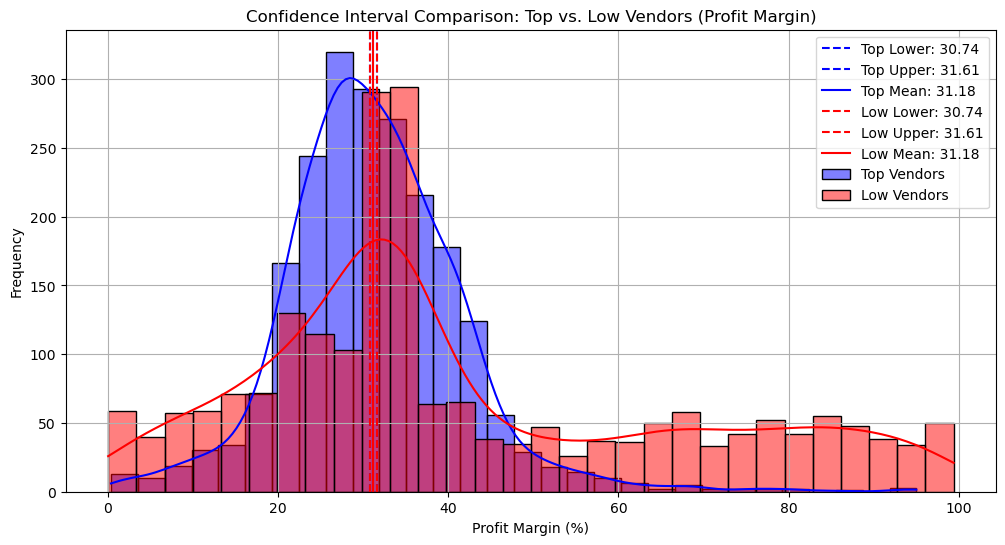

In [145]:
top_mean,top_lower,top_upper=confidence_interval(top_vendors)
low_mean,low_lower,low_upper=confidence_interval(top_vendors)
print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


In [147]:
from scipy.stats import ttest_ind


In [148]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)z
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Perform Two-Sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H₀: No significant difference in profit margins.")


T-Statistic: -17.6695, P-Value: 0.0000
Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.
